In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist



KNN

In [ ]:
def eculadine(vec1, vec2):
    reVec = np.empty((0, 2))
    i=0
    while(i<int(len(vec1))):
        reVec = np.append(reVec, np.sqrt(np.add(np.square((vec1[i]-vec2[i])), np.square((vec1[i+1]-vec2[i+1])))))  
        i+=2
    return reVec

In [ ]:
def get_neighbors(train_set, Y_train, test_row, K_Nearest):
    distances = list()
    for i in range (len(train_set)):
        print()
        dis = eculadine(train_set[i], test_row)
        distances.append((Y_train[i], dis))
    distances.sort(key=lambda tup: tup[1])

    neighbors = list()
    #print(distances)
    for i in range(K_Nearest):
        neighbors.append(distances[i][0])
    return neighbors

In [ ]:
def voting(neighbors):
    return max(neighbors,key=neighbors.count)

Stanalone Functions

In [2]:
def Loss(Y, Y_predicted):
    return(sum(np.square(Y - Y_predicted))/Y.size)

def Normalize(X):
    return((X-X.min())/(X.max()-X.min()))

def Binarize(X):
    X [X < 200] = 0
    X [X >= 200] = 1       
    return X


Image Processing Functions

In [3]:
def centroid(X):
    colSum=X.sum(axis=0)
    M00=np.sum(colSum)
    M10 =np.array([])
    M01 =np.array([])
    for i in range(7):
        M10= np.append(M10, (colSum[i]*i))
        
    for i in range(14):
       M01 = np.append(M01,(colSum[i]*i))
    M10 = np.sum(M10)
    M01 = np.sum(M01)
    if(M00==0):
        Xc= 0
        Yc= 0
    else:
        Xc = M10/M00
        Yc = M01/M00
    
    return np.array([Xc, Yc])


In [4]:
def FeatureImage(X):
    vector=np.array([])
    for i in range(2):
        for j in range(4):
            vector= np.append(vector, centroid(X[j*7:((j+1)*7) ,i*14:((i+1)*14)]))
    return vector

In [5]:
def plot_digit(X, y, idx):
    plt.imshow(X[idx], cmap='Greys', interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()

Program 

In [6]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X.shape

(60000, 28, 28)

In [7]:
train_X =Binarize(train_X)
train_X[0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 

In [19]:
vec = np.array([])
for i in range(60000):
    vec = np.append(vec, FeatureImage(train_X[i]))
vec.shape

(960000,)

In [20]:
vec =vec.reshape(60000, 16)
vec.shape

(60000, 16)

In [ ]:
vec = vec()

In [21]:
print(Loss(vec[10], vec[1]))
print(Loss(vec[0], vec[1]))
print(Loss(vec[10], vec[2000]))
print(Loss(vec[2002], vec[2000]))
print(train_y[10])
print(train_y[1])
print(train_y[2000])
print(train_y[2002])
print(train_y[0])


10.976408661913197
13.195995439915487
9.113985808914387
10.636716760832057
3
0
5
8
5


In [22]:
print(Loss(vec[5050], vec[2002]))


1.1707353967545666


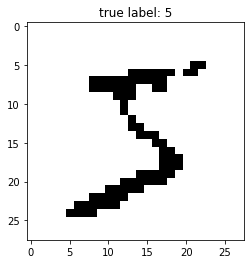

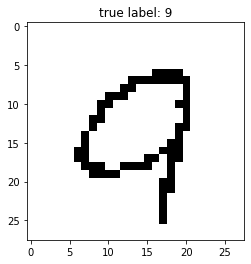

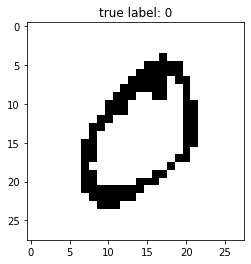

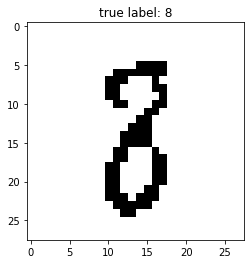

In [16]:
plot_digit(train_X, train_y, 0) 
plot_digit(train_X, train_y, 3000) 
plot_digit(train_X, train_y, 1) 
plot_digit(train_X, train_y, 5050 )
